<a href="https://colab.research.google.com/github/nafisa003/data-science-machine-learning/blob/main/Linear_Regression_(one_variable).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn import linear_model
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)

In [7]:
df=pd.read_csv('/content/canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


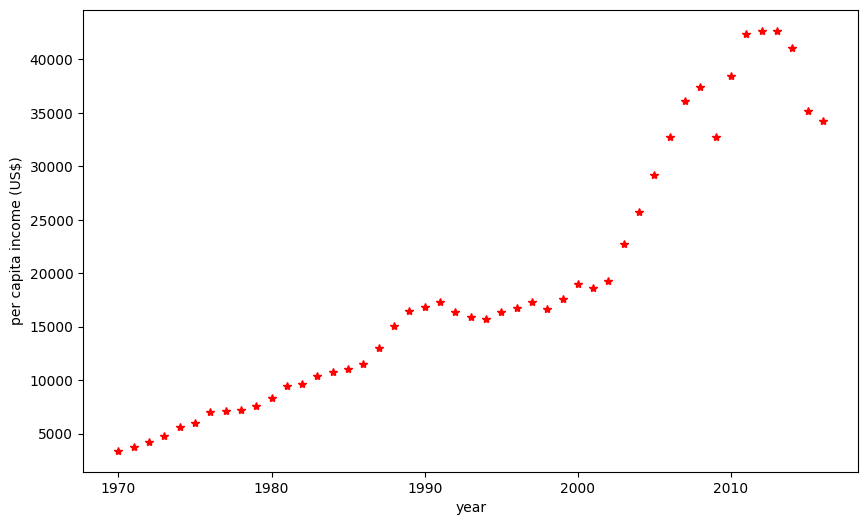

In [14]:
%matplotlib inline
plt.plot(df.year,df[['per capita income (US$)']],marker='*',color='red',linestyle='')
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.show()

In [15]:
regressor=linear_model.LinearRegression()

In [16]:
new_df=df.drop('per capita income (US$)',axis=1)
new_df.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [18]:
income=df['per capita income (US$)']
income.head()


0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [19]:
regressor.fit(new_df,income)

LinearRegression()

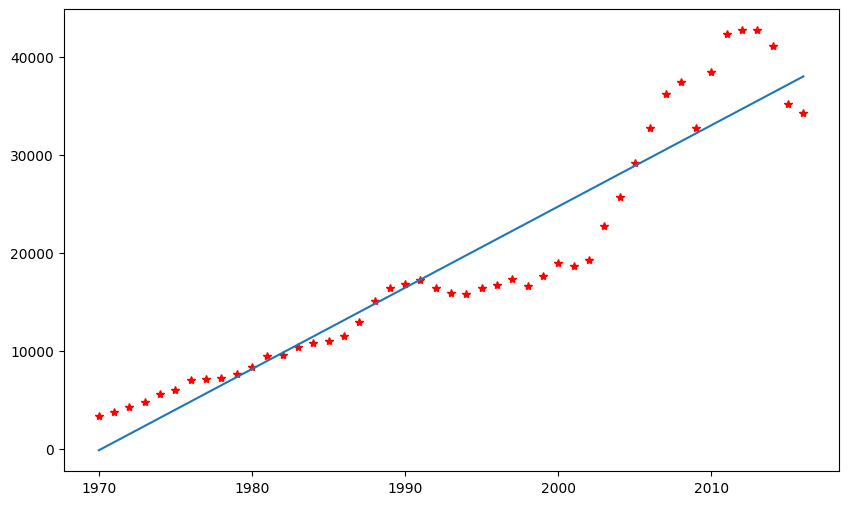

In [21]:
plt.plot(df.year,df[['per capita income (US$)']],marker='*',color='red',linestyle='')
plt.plot(new_df.year,regressor.predict(new_df[['year']]))

In [25]:
##predict per capita income in 2030
print(regressor.predict([[2030]]))

[49573.34484664]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Linear Regression from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn import linear_model
# %matplotlib inline
# matplotlib.rcParams['figure.figsize']=(10,6)

In [2]:
df=pd.read_csv('/content/data_for_lr.csv')

In [3]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


#Data Preprocessing

##Handling null values

In [5]:
df=df.dropna(axis=0)

In [6]:
df.shape

(699, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [10]:
x_train=np.array(df.x[0:500]).reshape(500,1)
y_train=np.array(df.y[0:500]).reshape(500,1)

x_test=np.array(df.x[500:]).reshape(199,1)
y_test=np.array(df.y[500:]).reshape(199,1)

In [11]:
x_train.shape

(500, 1)

###Linear Regression

####Forward Propagation

In [12]:
def forward_prop(train_input,params):
  m=params['m']
  c=params['c']

  predictions=np.multiply(m,train_input)+c

  return predictions

####Cost function

In [20]:
def cost_calculation(predictions,train_output):
  cost=np.mean((predictions-train_output)**2)*0.5

  return cost

####Gradient descent for backprop

(updated value of m)m'=m-alpha ((y'-y)/n)*x 

(updated value of c)c'=c-alpha ((y'-y)/n)*1

df=y'-y

dm=((y'-y)/n)*x

dc=(y'-y)/n

In [15]:
def back_prop(train_input,train_output,predictions):
  derivatives=dict()
  df=predictions-train_output
  dm=np.mean(np.multiply(df,train_input))
  dc=np.mean(df)

  derivatives['df']=df
  derivatives['dm']=dm
  derivatives['dc']=dc

  return derivatives


####update parameters
m=m-(learning_rate*dm)

c=c-(learning_rate*dc)

In [16]:
def update_params(params,derivatives,learning_rate):
    params['m']=params['m']-(learning_rate*derivatives['dm'])
    params['c']=params['c']-(learning_rate*derivatives['dc'])

    return params

####Training the model

In [25]:
def train(train_input,train_output,lr,iters):
  params=dict()
  params['m']=np.random.uniform(0,1)-1
  params['c']=np.random.uniform(0,1)-1

  plt.figure()
  loss=list()
  for i in range(iters):
        #forward propagation
        predictions=forward_prop(train_input,params)

        #cost
        cost=cost_calculation(predictions,train_output)
        loss.append(cost)

        fig,ax=plt.subplots()
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend=ax.legend()

        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        plt.figure(figsize=(5,4))      
        plt.show()

        ##backward propagation
        derivatives=back_prop(train_input,train_output,predictions)

        ##update parameters
        params=update_params(params,derivatives,lr)

  return params,loss

<Figure size 1000x600 with 0 Axes>

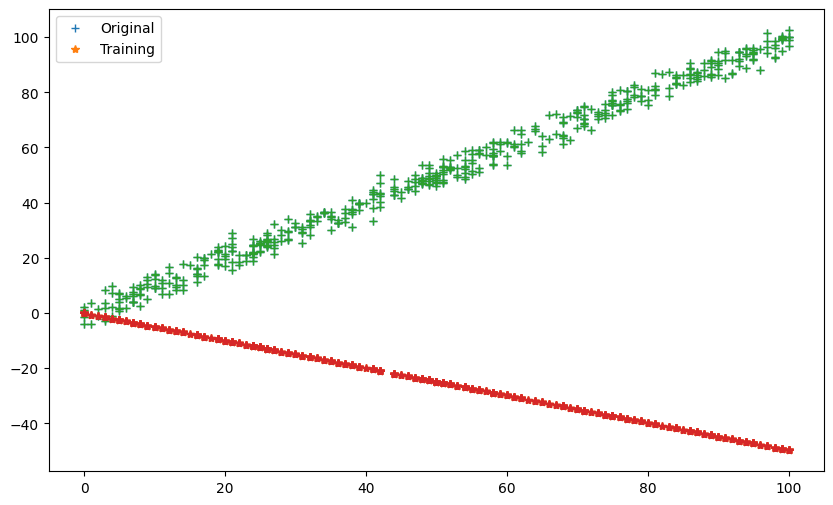

<Figure size 500x400 with 0 Axes>

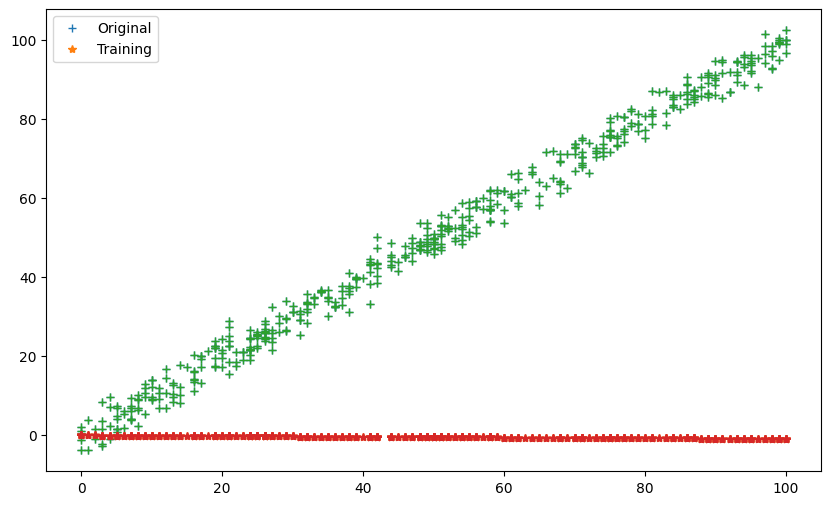

<Figure size 500x400 with 0 Axes>

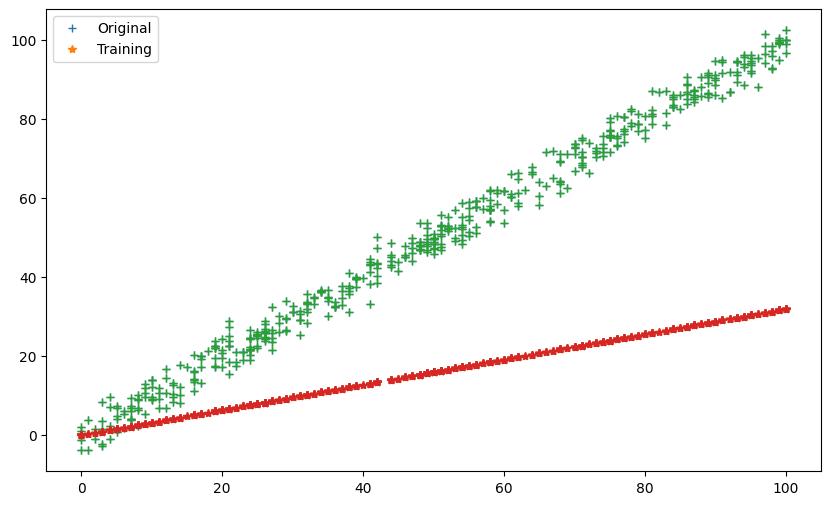

<Figure size 500x400 with 0 Axes>

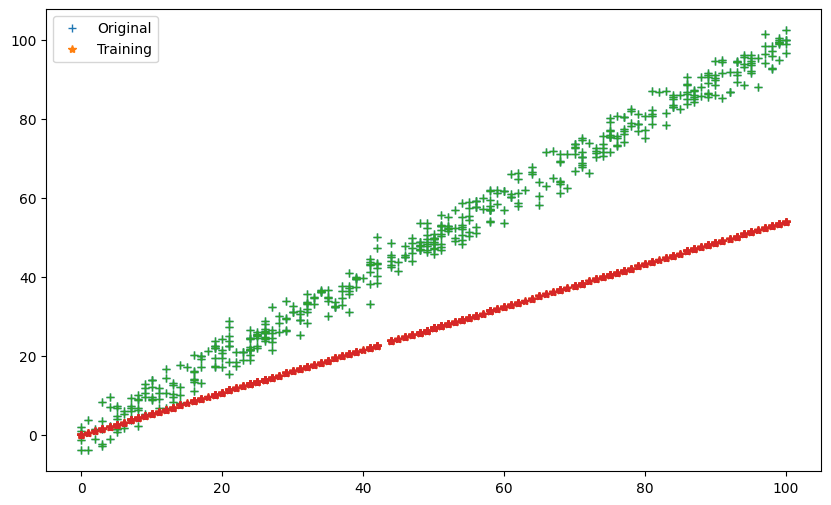

<Figure size 500x400 with 0 Axes>

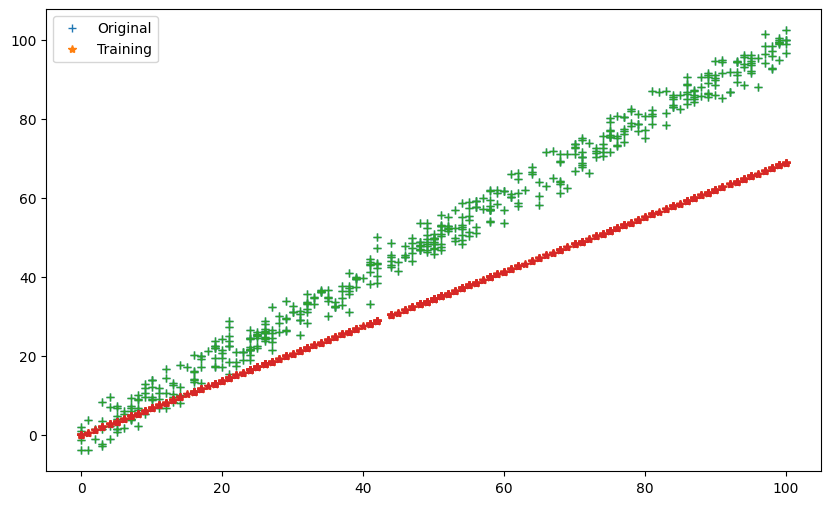

<Figure size 500x400 with 0 Axes>

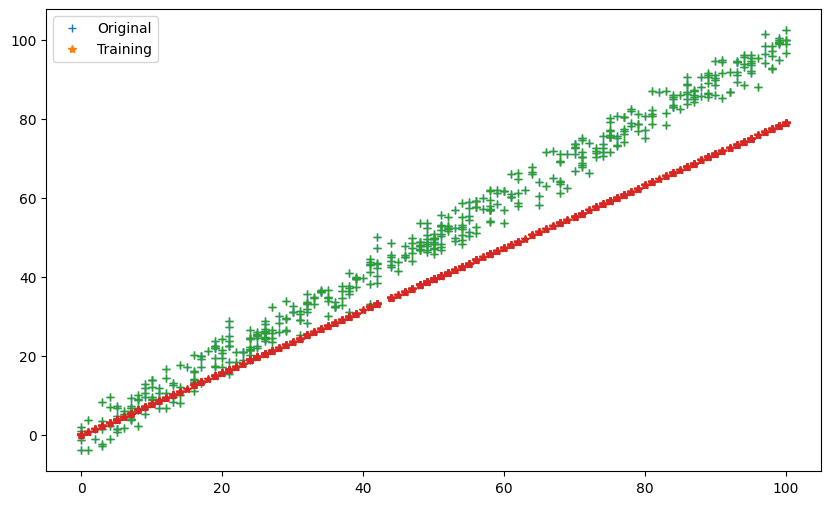

<Figure size 500x400 with 0 Axes>

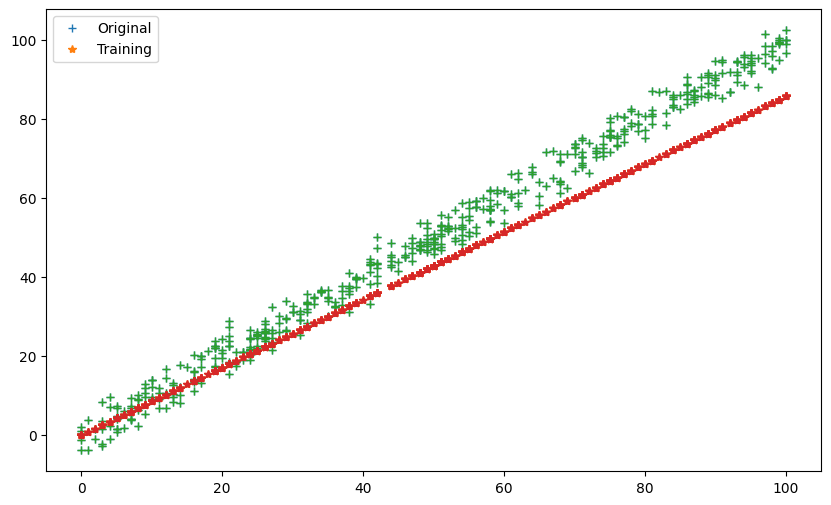

<Figure size 500x400 with 0 Axes>

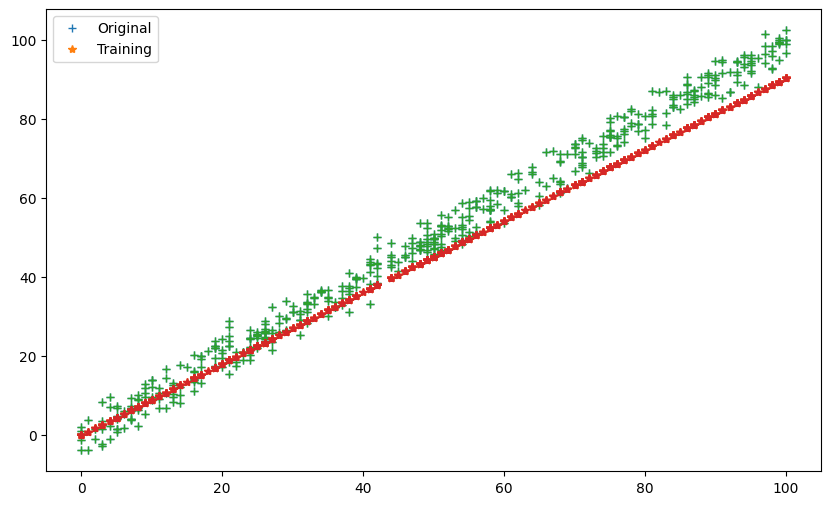

<Figure size 500x400 with 0 Axes>

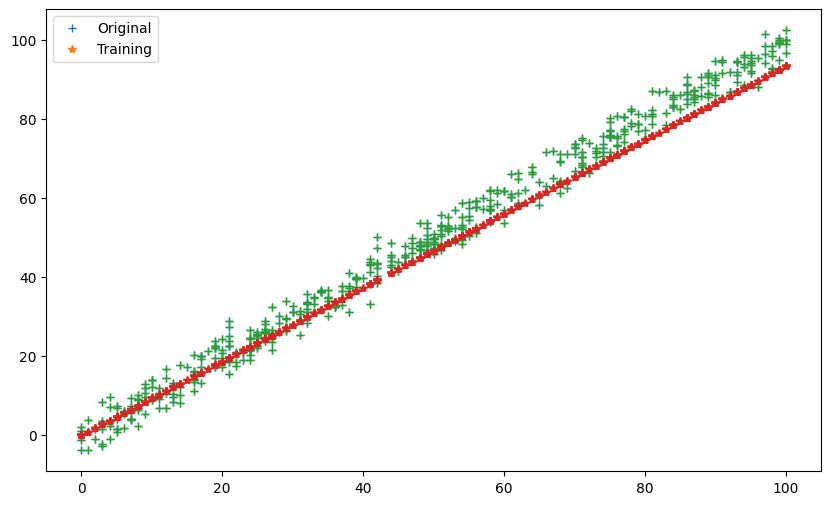

<Figure size 500x400 with 0 Axes>

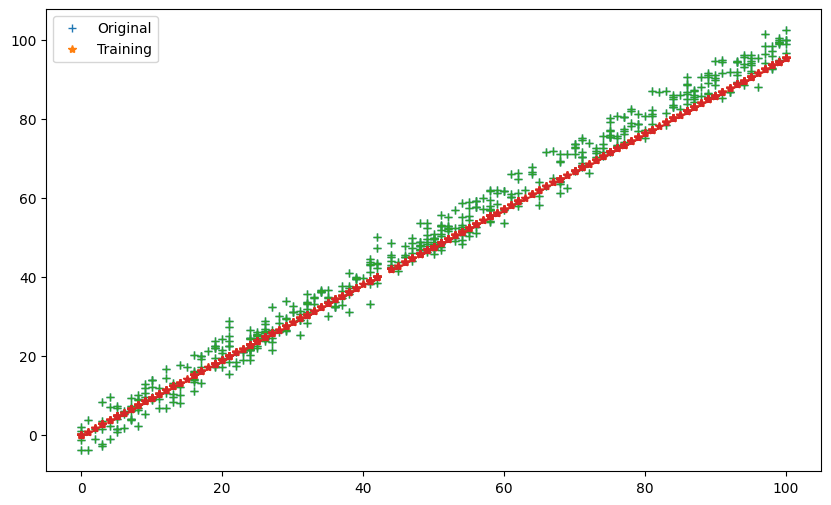

<Figure size 500x400 with 0 Axes>

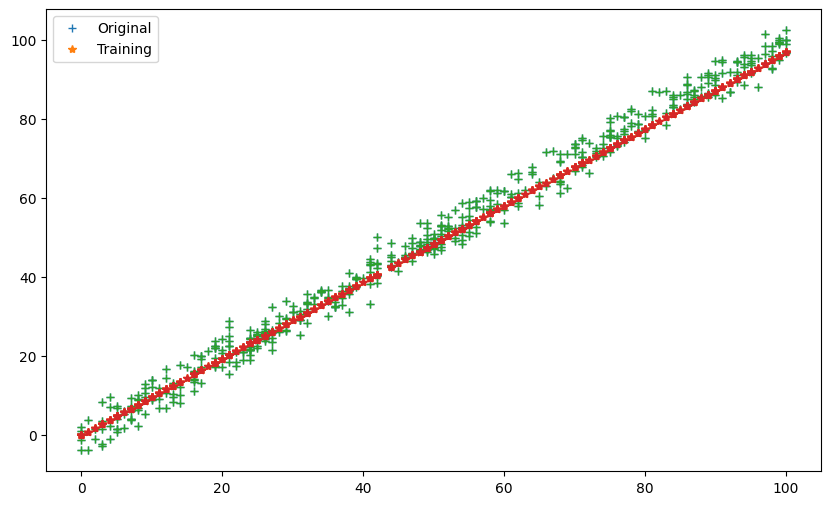

<Figure size 500x400 with 0 Axes>

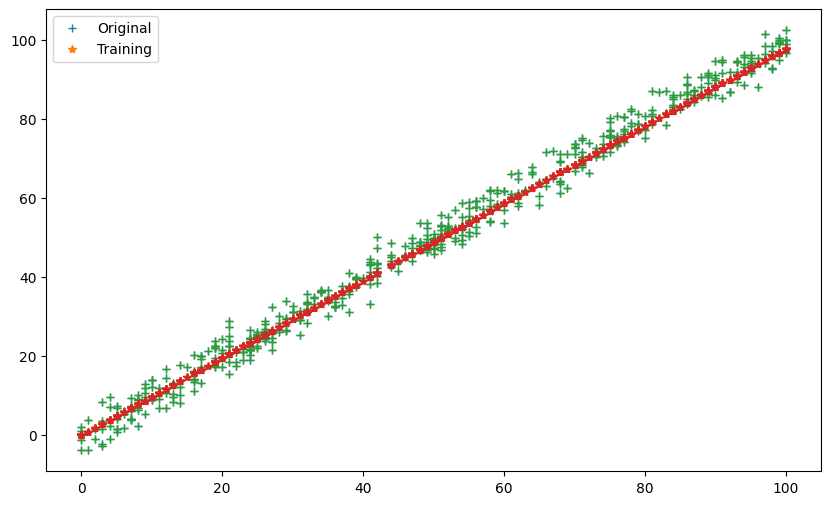

<Figure size 500x400 with 0 Axes>

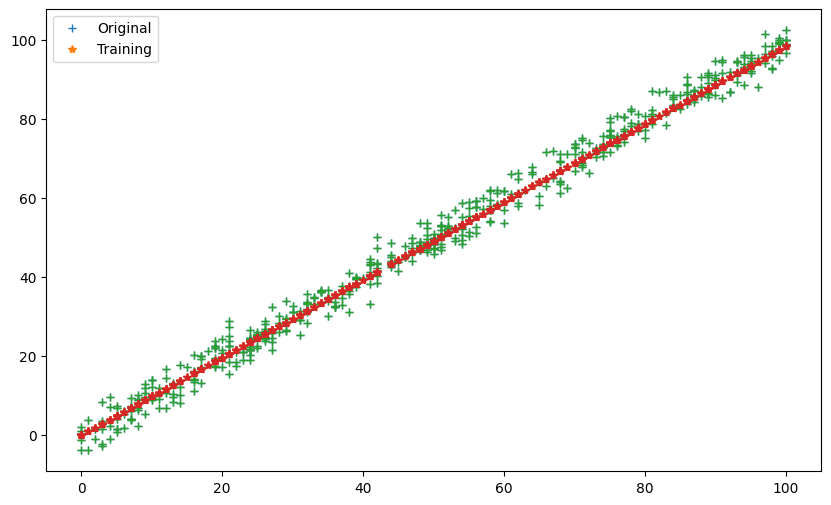

<Figure size 500x400 with 0 Axes>

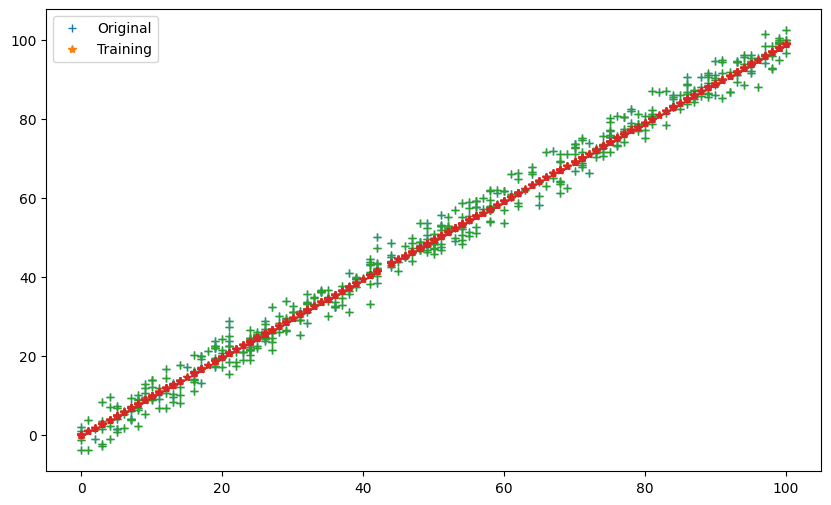

<Figure size 500x400 with 0 Axes>

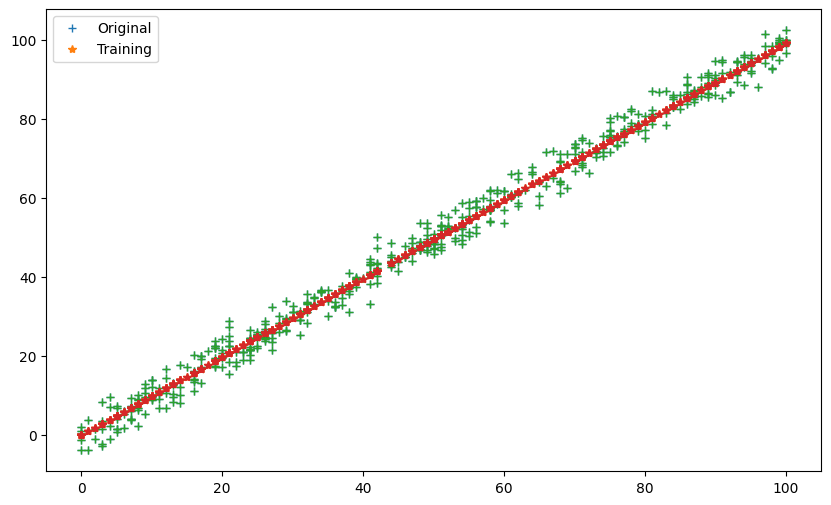

<Figure size 500x400 with 0 Axes>

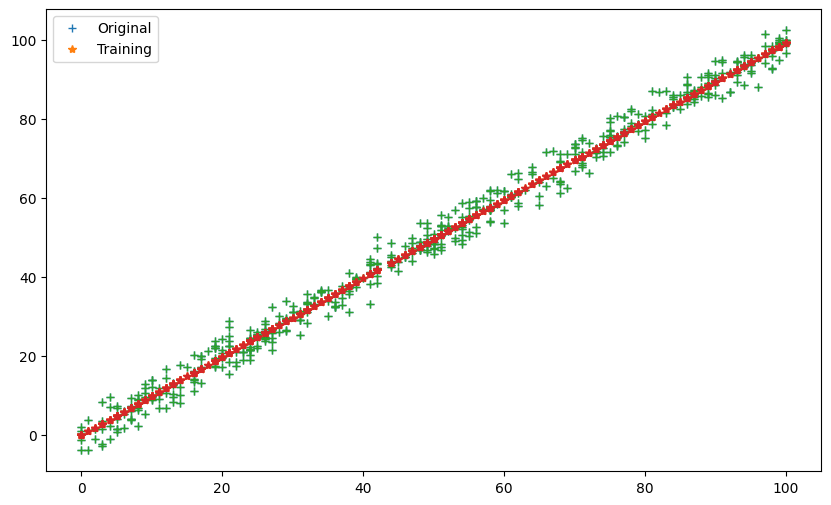

<Figure size 500x400 with 0 Axes>

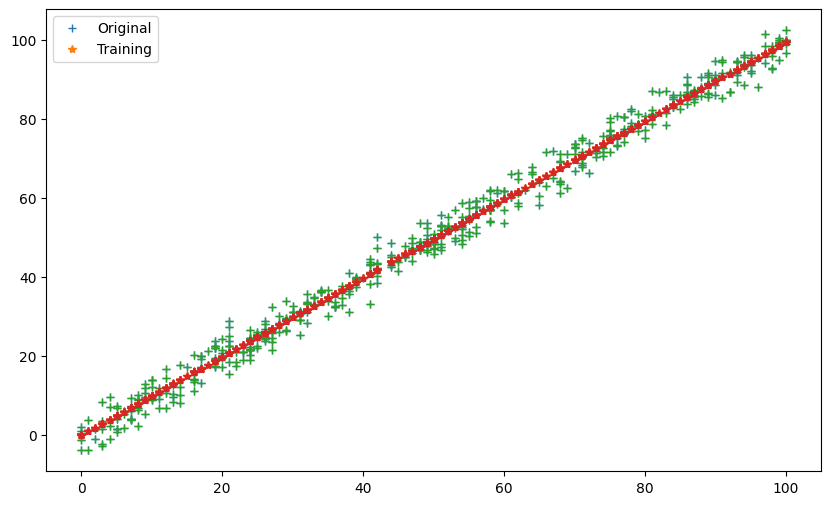

<Figure size 500x400 with 0 Axes>

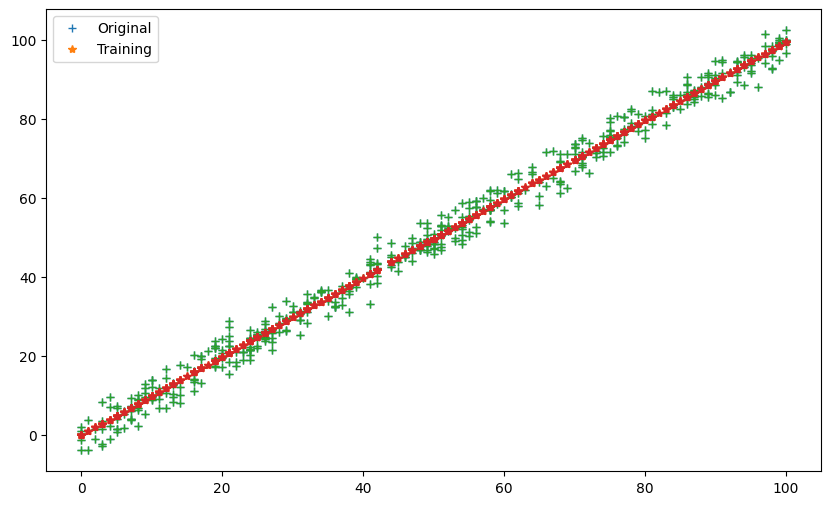

<Figure size 500x400 with 0 Axes>

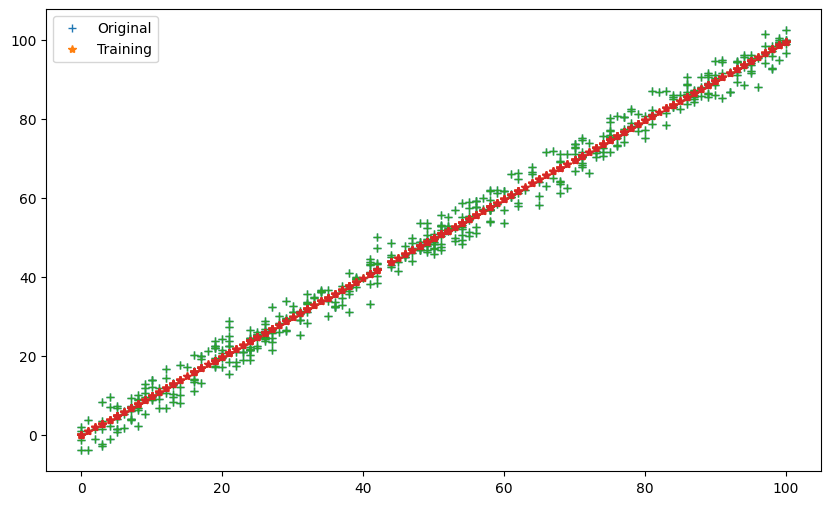

<Figure size 500x400 with 0 Axes>

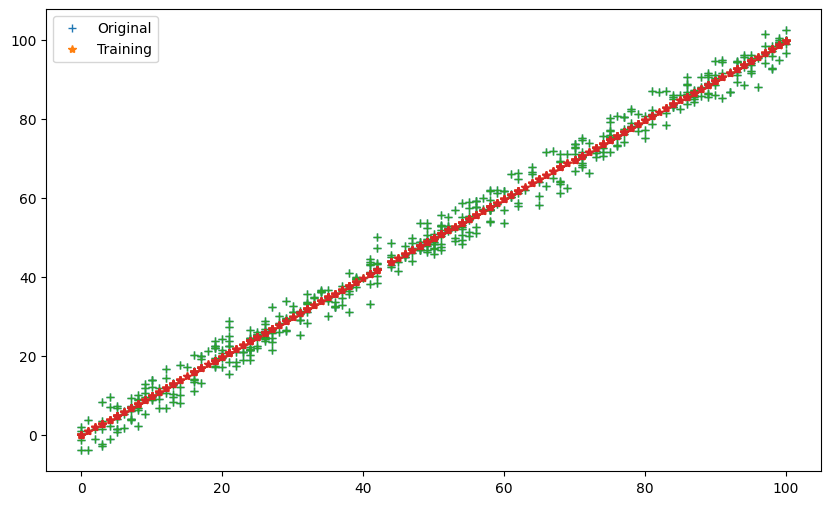

<Figure size 500x400 with 0 Axes>

In [26]:
parameters, loss = train(x_train,y_train, 0.0001, 20)

In [27]:
print(parameters)

{'m': 0.9978568817144678, 'c': -0.06500284495648768}


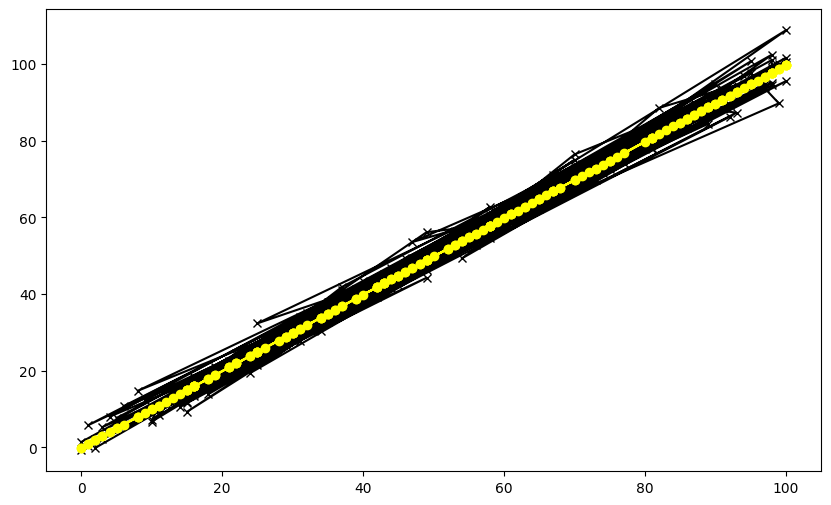

In [28]:
test_predictions=x_test*parameters['m']+parameters['c']
plt.figure()
plt.plot(x_test,y_test,marker='x',color='black')
plt.plot(x_test,test_predictions,marker='o',color='yellow')
plt.show()


In [29]:
cost_calculation(test_predictions,y_test)

4.010755551093486

#Using sklearn 

In [30]:
from sklearn import linear_model

In [31]:
regressor=linear_model.LinearRegression()

In [32]:
regressor.fit(x_train,y_train)

LinearRegression()

In [33]:
predict_sk=regressor.predict(x_test)

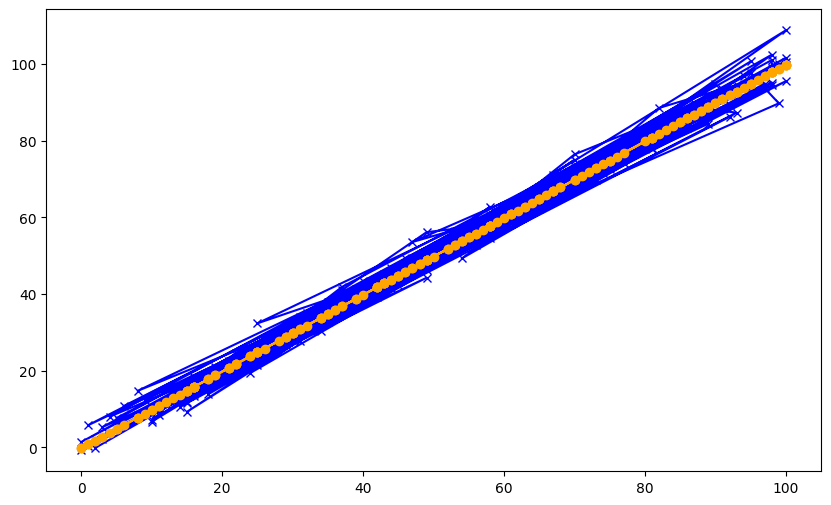

In [34]:
plt.figure()
plt.plot(x_test,y_test,marker='x',color='blue')
plt.plot(x_test,predict_sk,marker='o',color='orange')
plt.show()

In [35]:
cost_calculation(predict_sk,y_test)

4.015015795917689

In [36]:
from sklearn.metrics import mean_squared_error as mse

In [37]:
error=mse(y_test,predict_sk)

In [38]:
print(error)

8.030031591835378
